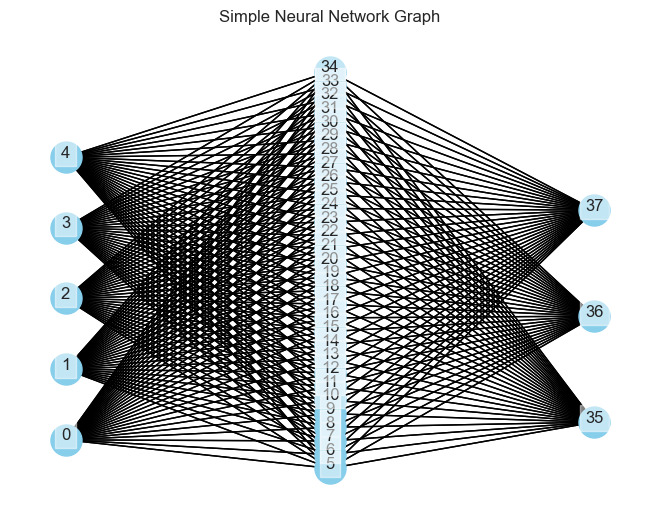

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.Graph()

# 添加节点，表示神经网络的不同层
layers = [5, 30, 3]  # 输入层5节点，隐藏层3节点，输出层2节点
layer_names = ['Input', 'Hidden', 'Output']

# 添加节点到图中
for i, layer_size in enumerate(layers):
    for j in range(layer_size):
        G.add_node(j + sum(layers[:i]), layer=i, name=f'N{j}')

# 添加边，链接不同层之间的节点
for layer in range(len(layers) - 1):
    current_layer_size = layers[layer]
    next_layer_size = layers[layer + 1]
    layer_edges = [(j + sum(layers[:layer]), k + sum(layers[:layer + 1]))
                   for j in range(current_layer_size) for k in range(next_layer_size)]
    G.add_edges_from(layer_edges)

# 设置节点位置
pos = {}
for i, layer in enumerate(layers):
    offset = sum(layers[:i])
    for j in range(layer):
        node_name = j + offset
        pos[node_name] = np.array([i * 2, (j - layer / 2.0) / (layer + 1)])

# 绘制节点和边
nx.draw(G, pos=pos, with_labels=False)
import matplotlib.pyplot as plt

# 绘制节点和边
nx.draw(G, pos=pos, with_labels=False, node_size=500, node_color='skyblue')

# 添加标签
for node, (x, y) in pos.items():
    plt.text(x, y, s=str(node), bbox=dict(facecolor='white', alpha=0.5),
             horizontalalignment='center', fontsize=12)

# 显示图形
plt.title("Simple Neural Network Graph")
plt.show()

In [2]:
# 设置图片大小，背景未透明，颜色未蓝色

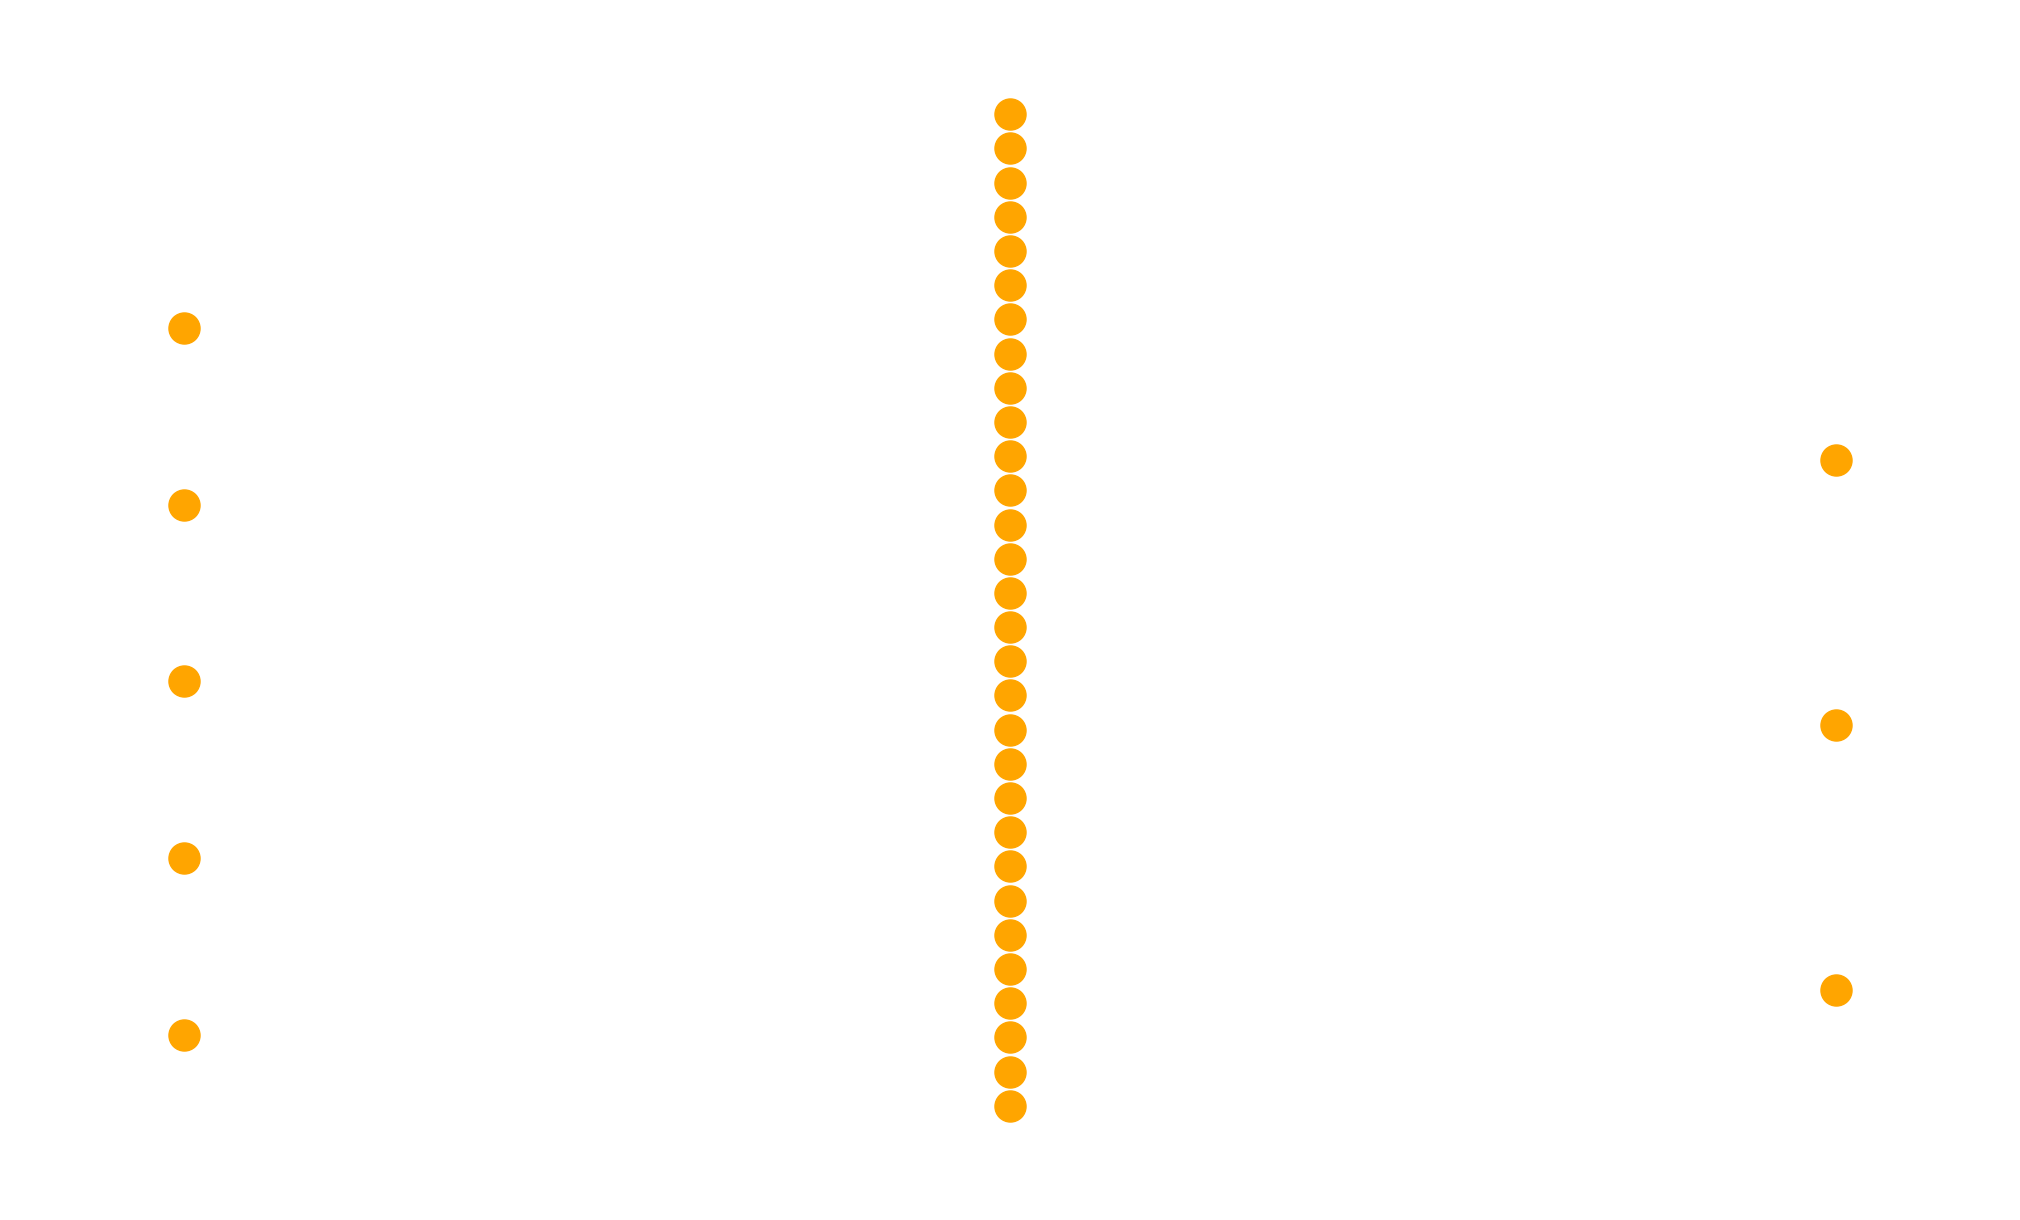

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.Graph()

# 添加节点，表示神经网络的不同层
layers = [5, 30, 3]  # 输入层5节点，隐藏层3节点，输出层2节点
layer_names = ['Input', 'Hidden', 'Output']

# 添加节点到图中
for i, layer_size in enumerate(layers):
    for j in range(layer_size):
        G.add_node(j + sum(layers[:i]), layer=i, name=f'N{j}')

# 添加边，链接不同层之间的节点
for layer in range(len(layers) - 1):
    current_layer_size = layers[layer]
    next_layer_size = layers[layer + 1]
    layer_edges = [(j + sum(layers[:layer]), k + sum(layers[:layer + 1]))
                   for j in range(current_layer_size) for k in range(next_layer_size)]
    G.add_edges_from(layer_edges)

# 设置节点位置
pos = {}
for i, layer in enumerate(layers):
    offset = sum(layers[:i])
    for j in range(layer):
        node_name = j + offset
        pos[node_name] = np.array([i * 2, (j - layer / 2.0) / (layer + 1)])

# 设置图形大小
plt.figure(figsize=(20, 12))

# 绘制节点和边，边颜色为蓝色，节点颜色为橙色
nx.draw(G, pos=pos, with_labels=False, node_size=500, node_color='orange', edge_color='white')

# 添加标签
# for node, (x, y) in pos.items():
#     plt.text(x, y, s=str(node), bbox=dict(facecolor='white', alpha=0.5),
#              horizontalalignment='center', fontsize=12)

# 设置背景透明
plt.gca().patch.set_alpha(0)

# 显示图形
plt.title("")
# plt.show()

# 输出到当前目录
# 移除背景色
plt.gca().set_facecolor('none')
# 保存图像到当前目录
plt.savefig("graph.png", transparent=True, bbox_inches='tight', pad_inches=0)

In [4]:
# 5 层，不含隐含层

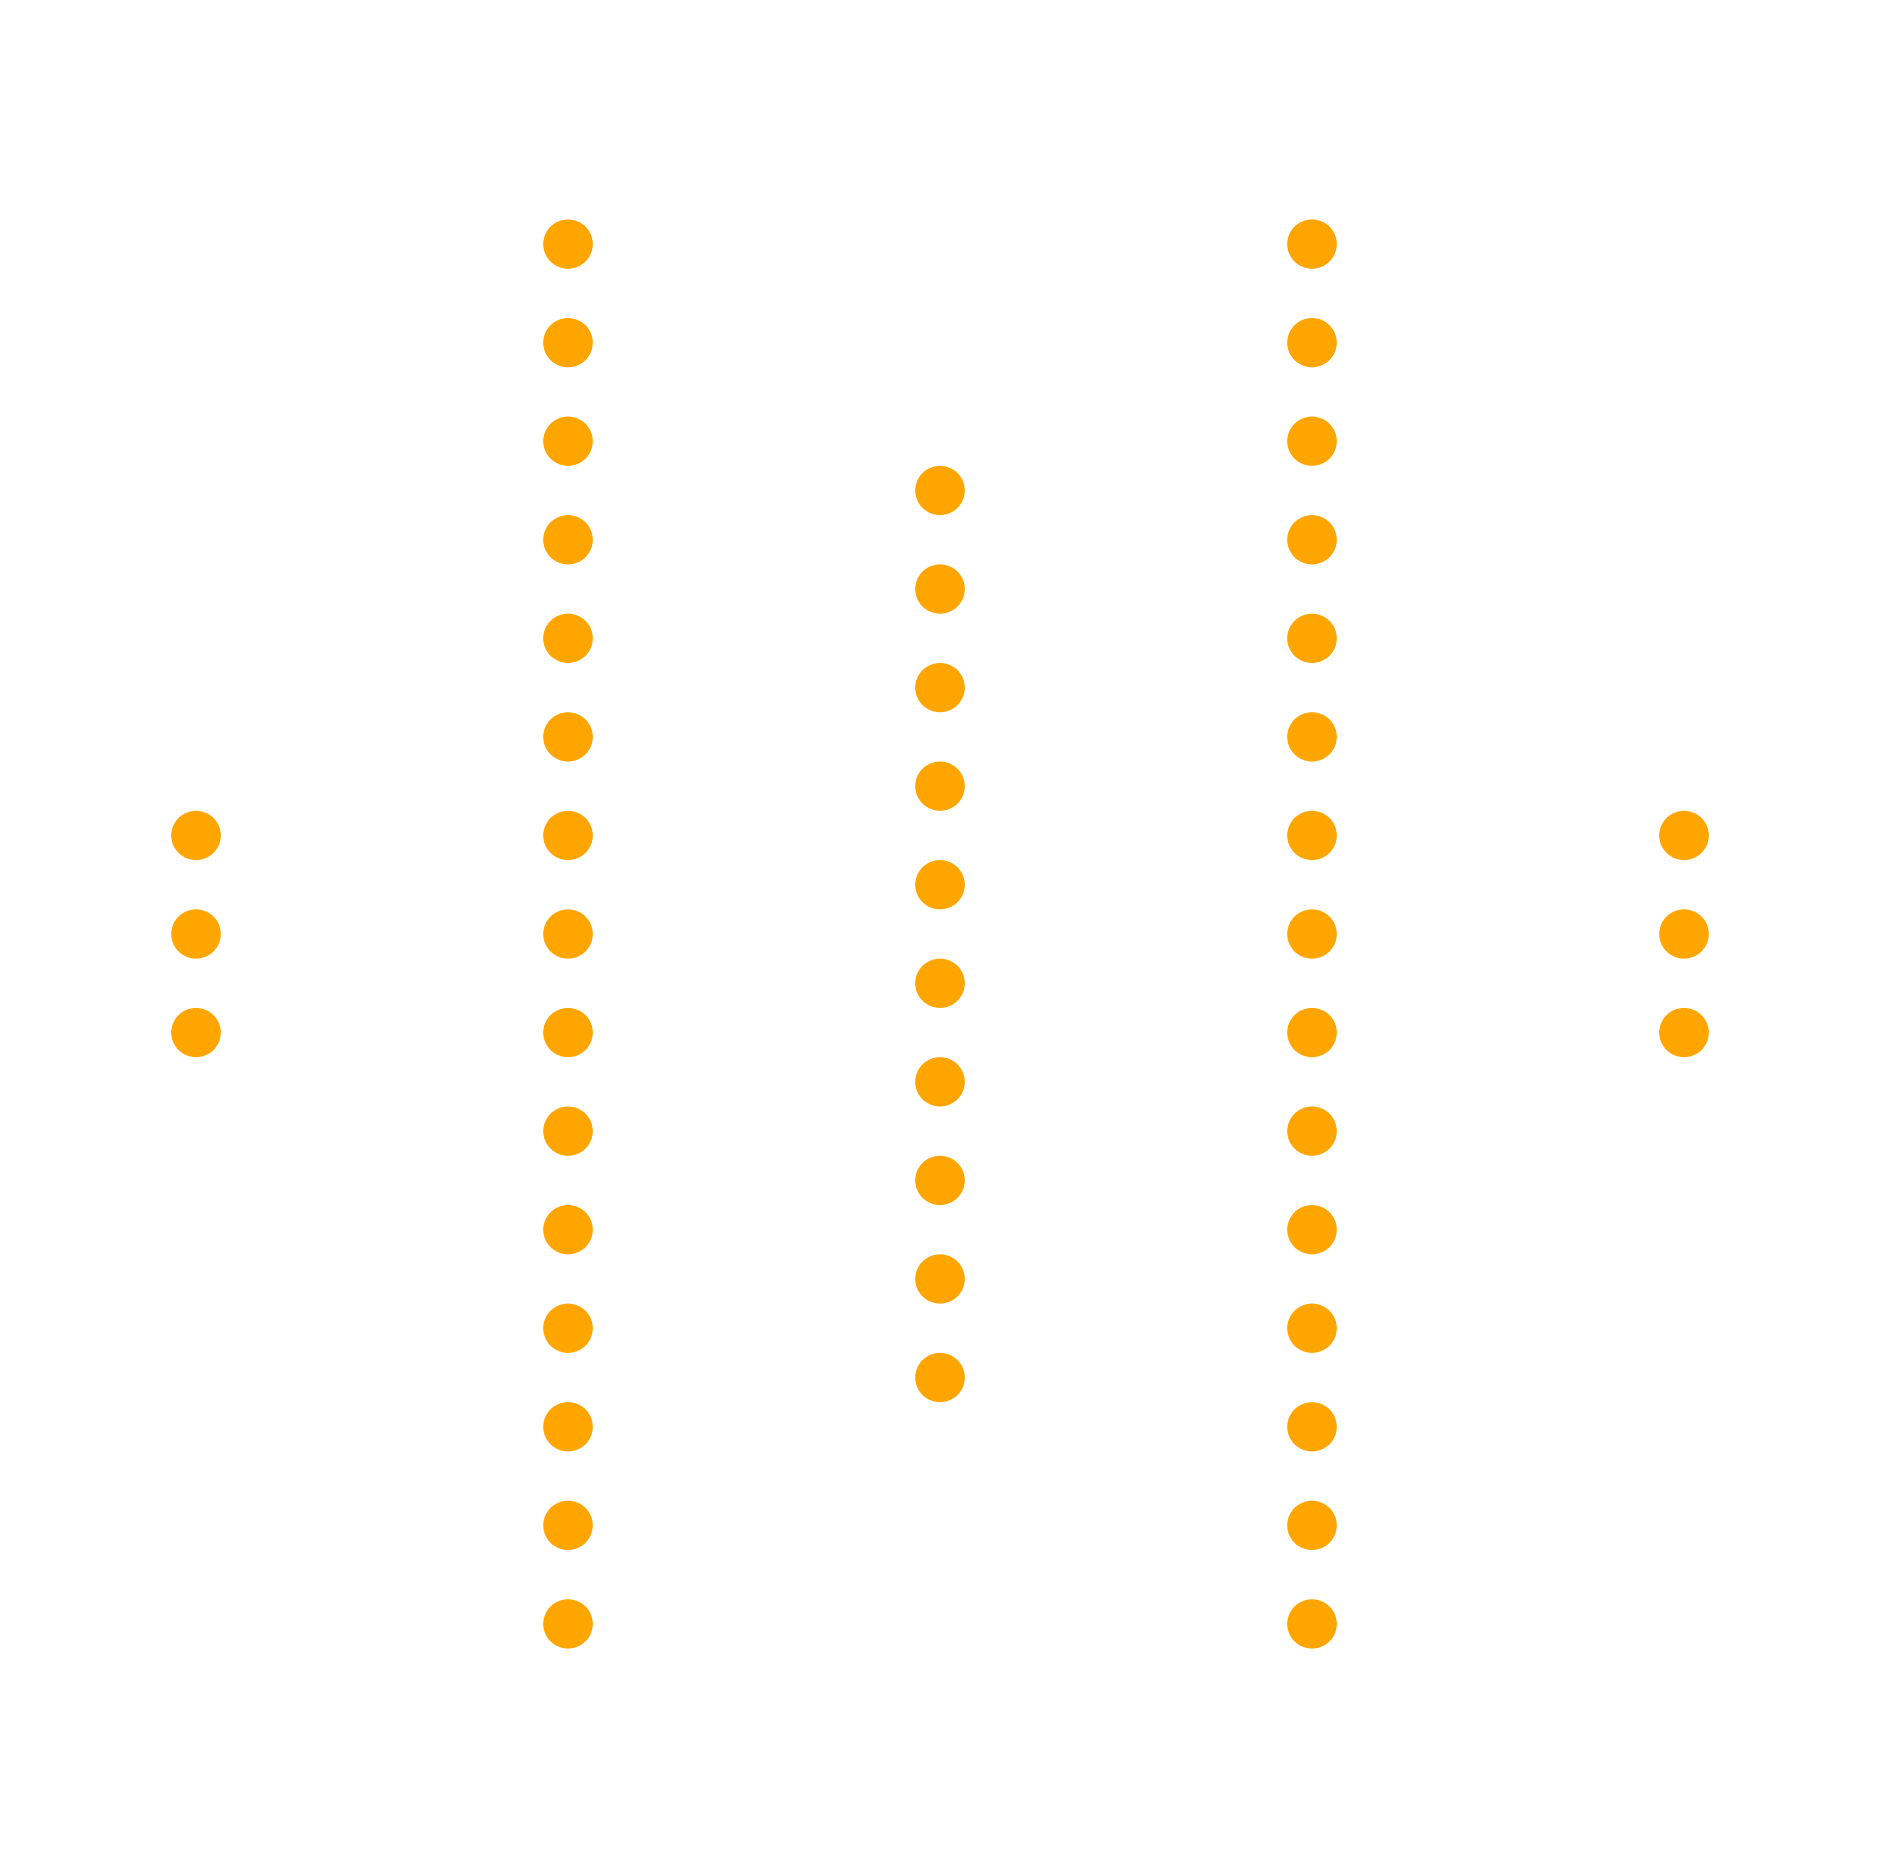

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_network(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :param ax: matplotlib axes object
    :param left: The center of the leftmost node(s) will be placed here
    :param right: The center of the rightmost node(s) will be placed here
    :param bottom: The center of the bottommost node(s) will be placed here
    :param top: The center of the topmost node(s) will be placed here
    :param layer_sizes: List containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for i, n in enumerate(layer_sizes):
        layer_top = v_spacing*(n - 1)/2. + (top + bottom)/2.
        for m in range(n):
            circle = plt.Circle((i*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='none', zorder=4)
            ax.add_artist(circle)
            if i == 0:
                circle.set_facecolor('orange')
            elif i == len(layer_sizes) - 1:
                circle.set_facecolor('orange')
            else:
                circle.set_facecolor('orange')

    # Edges
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([i*h_spacing + left, (i + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='w')
                ax.add_artist(line)

fig = plt.figure(figsize=(24, 24))
ax = fig.gca()

ax.axis('off')

# Layer sizes
layer_sizes = [3, 15, 10, 15, 3]

draw_neural_network(ax, .1, .9, .1, .9, layer_sizes)

# plt.show()
plt.gca().set_facecolor('none')
# 保存图像到当前目录
plt.savefig("graph.png", transparent=True, bbox_inches='tight', pad_inches=0)